In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!unzip -q /content/drive/MyDrive/Technical_test_font.zip -d /content

!ls /content/Technical_test_fonta


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
ls: cannot access '/content/Technical_test_fonta': No such file or directory


# EDA

In [ ]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from PIL import Image


In [ ]:

ROOT = Path('/content/Technical_test_font/dataset_word_color')
assert ROOT.exists(), "dataset_word_color not found at the given path."

rows = []
for font_dir in sorted([d for d in ROOT.iterdir() if d.is_dir()]):
    font = font_dir.name
    for p in font_dir.glob('*.png'):
        rows.append({
            "FileName": p.name,
            "Font": font,
            "image_path": str(p)
        })

df = pd.DataFrame(rows)
print("Total images:", len(df), "| Fonts:", df["Font"].nunique())
df.head()


Total images: 349120 | Fonts: 23


,FileName,Font,image_path
0,68192326-f81b-492d-9d38-412f49ab003a.png,AllerDisplay,/content/Technical_test_font/dataset_word_colo...
1,376c6ae9-4ebb-4fa5-82f1-77668238050b.png,AllerDisplay,/content/Technical_test_font/dataset_word_colo...
2,064310c3-7882-4402-85e9-d42ecf886470.png,AllerDisplay,/content/Technical_test_font/dataset_word_colo...
3,f73b85e2-15ea-443d-8c2f-7ca6197947ae.png,AllerDisplay,/content/Technical_test_font/dataset_word_colo...
4,702deb9d-613f-449e-b757-e5484c031c1f.png,AllerDisplay,/content/Technical_test_font/dataset_word_colo...


In [ ]:
df['Font'].value_counts()

,count
Font,
Oswald-Regular,19420
Oswald-Bold,19123
Roboto-Bold,18706
TimesNRMTPro-Bold,18058
ITCGaramondStd-Bd,17857
Aller_Bd,17847
Roboto-Regular,17320
OpenSans-Bold,17013
BaskervillePro-Bold,16796


In [ ]:
hist=df['Font'].value_counts()

In [ ]:
import matplotlib.pyplot as plt

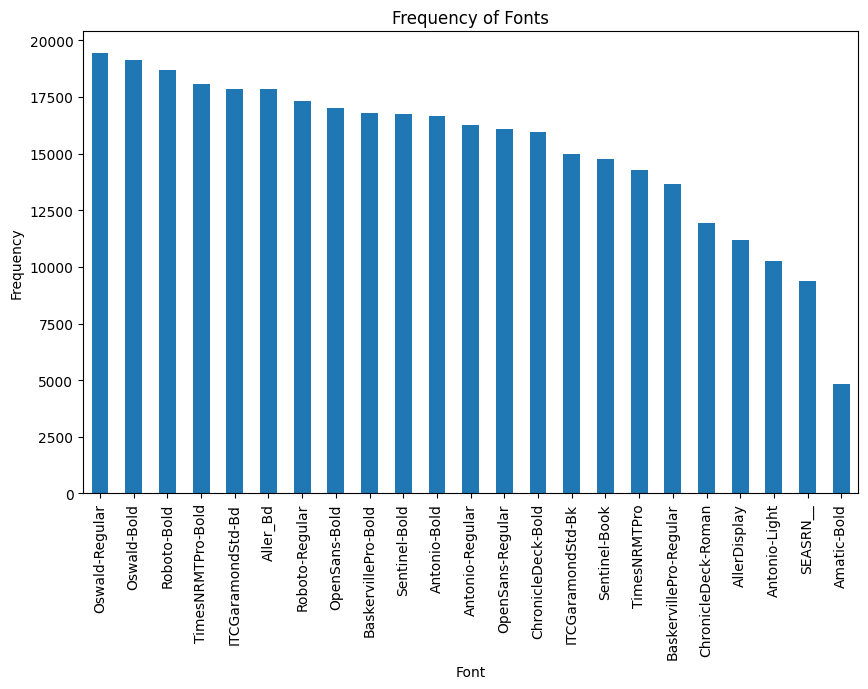

In [ ]:
plt.figure(figsize=(10,6))
hist.plot(kind='bar')
plt.title('Frequency of Fonts')
plt.xlabel('Font')
plt.ylabel('Frequency')
plt.show()

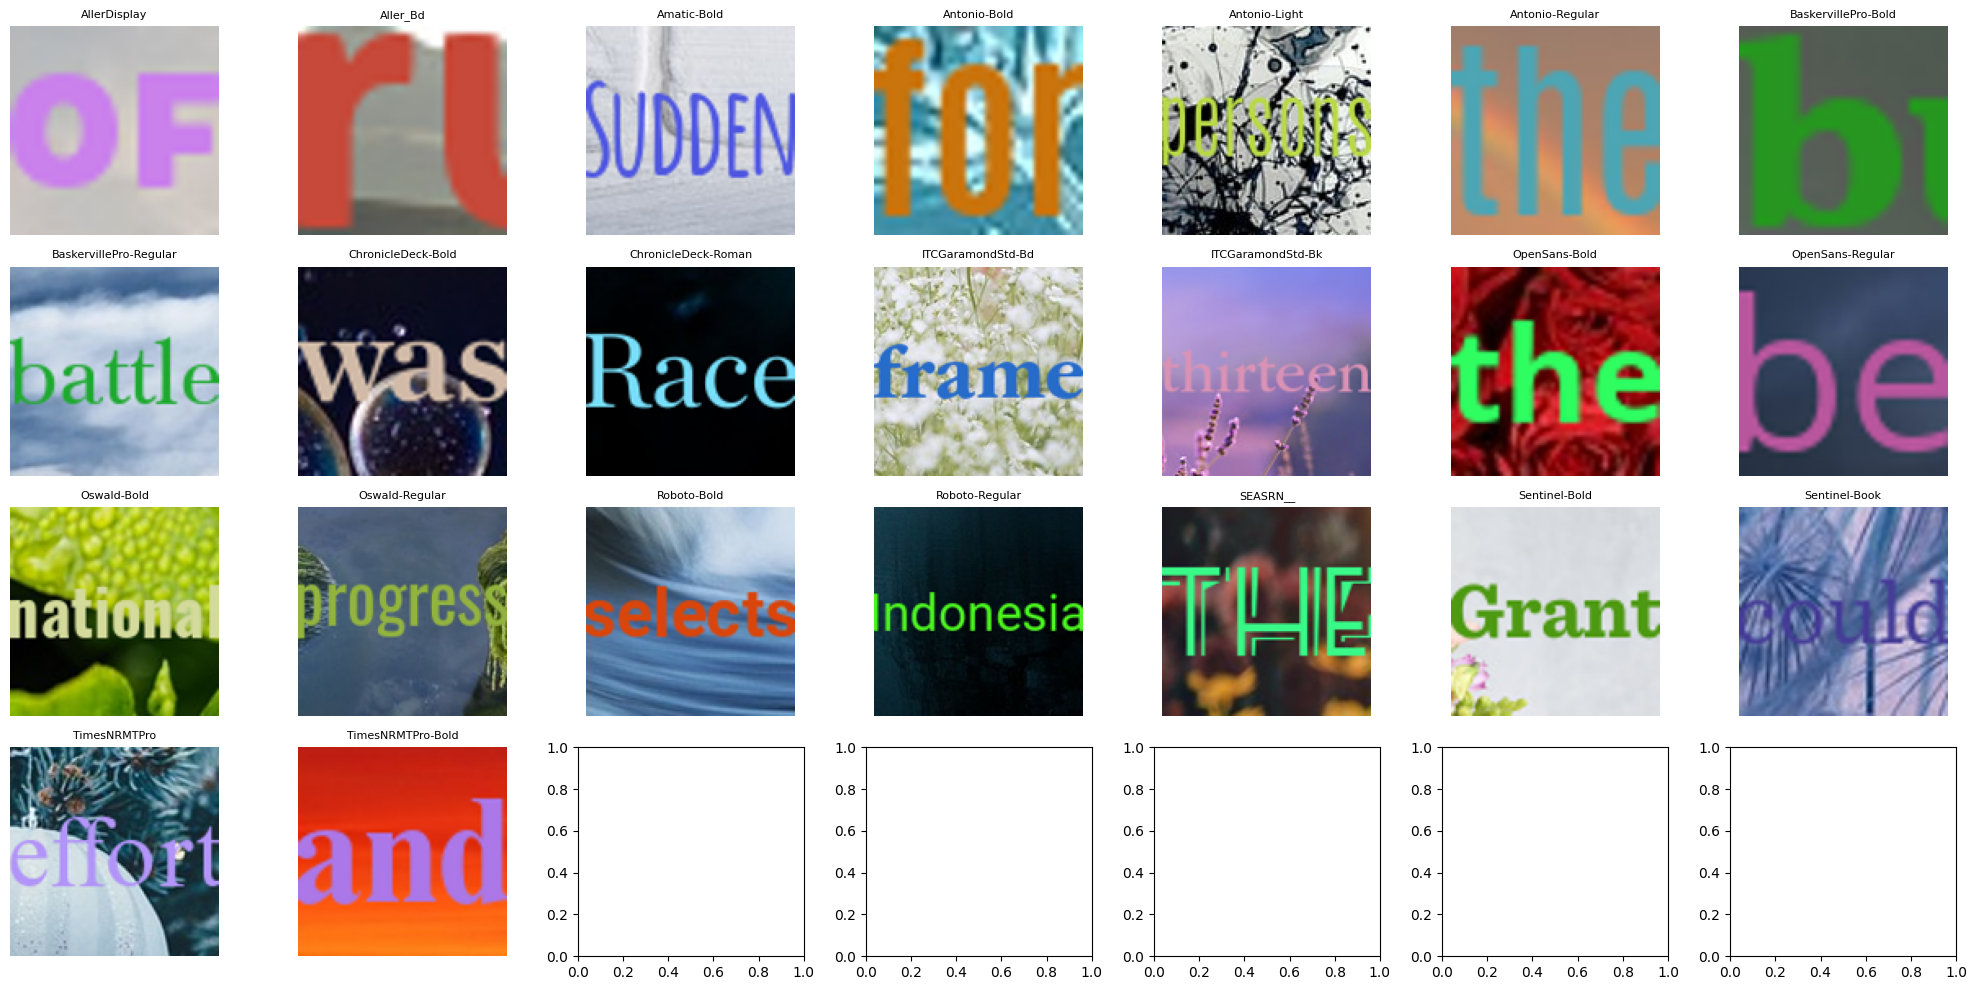

In [ ]:


# plotting one image per font
sample_df = df.groupby("Font").sample(1, random_state=42).reset_index(drop=True)

n_cols =7
n_rows = 4
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 10))

for ax, (_, row) in zip(axes.flat, sample_df.iterrows()):
    img = Image.open(row["image_path"])
    ax.imshow(img)
    ax.set_title(row["Font"], fontsize=8)
    ax.axis("off")

plt.tight_layout()
plt.show()


# Dataset preparation



In [ ]:
fonts = sorted(df["Font"].unique())
font_to_id = {f:i for i,f in enumerate(fonts)}
id_to_font = {i:f for f,i in font_to_id.items()}

df["label_id"] = df["Font"].map(font_to_id)

print("Num classes:", len(fonts))
print("Example mapping:", list(font_to_id.items())[:5])
df.head()


Num classes: 23
Example mapping: [('AllerDisplay', 0), ('Aller_Bd', 1), ('Amatic-Bold', 2), ('Antonio-Bold', 3), ('Antonio-Light', 4)]


,FileName,Font,image_path,label_id
0,68192326-f81b-492d-9d38-412f49ab003a.png,AllerDisplay,/content/Technical_test_font/dataset_word_colo...,0
1,376c6ae9-4ebb-4fa5-82f1-77668238050b.png,AllerDisplay,/content/Technical_test_font/dataset_word_colo...,0
2,064310c3-7882-4402-85e9-d42ecf886470.png,AllerDisplay,/content/Technical_test_font/dataset_word_colo...,0
3,f73b85e2-15ea-443d-8c2f-7ca6197947ae.png,AllerDisplay,/content/Technical_test_font/dataset_word_colo...,0
4,702deb9d-613f-449e-b757-e5484c031c1f.png,AllerDisplay,/content/Technical_test_font/dataset_word_colo...,0


### train test split

In [ ]:

train_df, val_df = train_test_split(
    df,
    test_size=0.2,
    stratify=df["label_id"],
    random_state=42
)

print("Train size:", len(train_df), " | Val size:", len(val_df))
print("Classes in train:", train_df['label_id'].nunique(), "| in val:", val_df['label_id'].nunique())


Train size: 279296  | Val size: 69824
Classes in train: 23 | in val: 23


In [ ]:

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen   = ImageDataGenerator(rescale=1./255)

BATCH_SIZE = 32
TARGET_SIZE = (224, 224)

train_gen = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col="image_path",
    y_col="Font",
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",   
    shuffle=True,
    seed=42
)

val_gen = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col="image_path",
    y_col="Font",
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)

train_gen.class_indices


Found 279296 validated image filenames belonging to 23 classes.
Found 69824 validated image filenames belonging to 23 classes.


{'AllerDisplay': 0,
 'Aller_Bd': 1,
 'Amatic-Bold': 2,
 'Antonio-Bold': 3,
 'Antonio-Light': 4,
 'Antonio-Regular': 5,
 'BaskervillePro-Bold': 6,
 'BaskervillePro-Regular': 7,
 'ChronicleDeck-Bold': 8,
 'ChronicleDeck-Roman': 9,
 'ITCGaramondStd-Bd': 10,
 'ITCGaramondStd-Bk': 11,
 'OpenSans-Bold': 12,
 'OpenSans-Regular': 13,
 'Oswald-Bold': 14,
 'Oswald-Regular': 15,
 'Roboto-Bold': 16,
 'Roboto-Regular': 17,
 'SEASRN__': 18,
 'Sentinel-Bold': 19,
 'Sentinel-Book': 20,
 'TimesNRMTPro': 21,
 'TimesNRMTPro-Bold': 22}

**Sanity check**

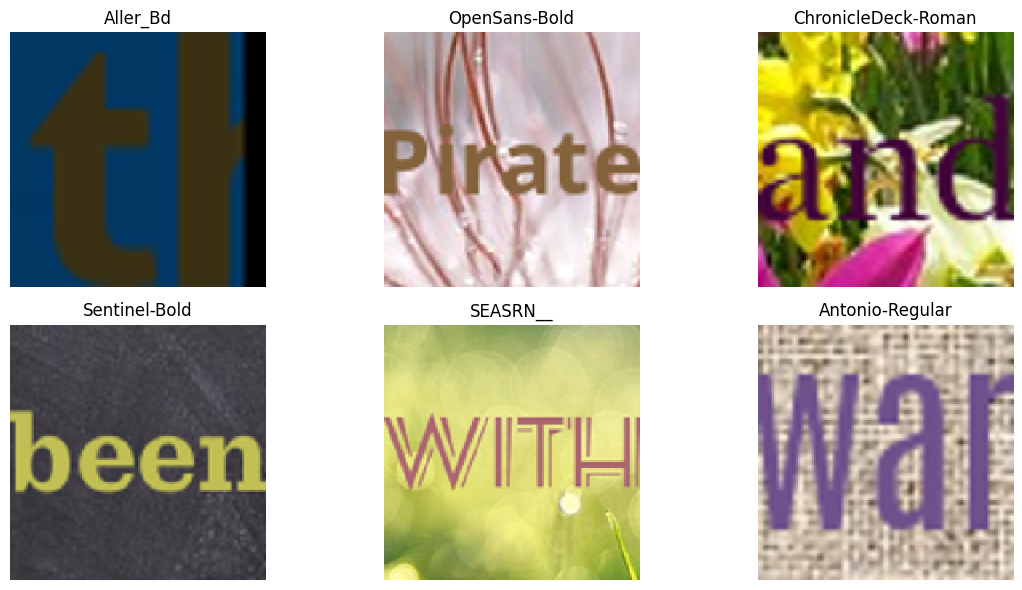

In [ ]:


x_batch, y_batch = next(train_gen)

idx_to_class = {v:k for k,v in train_gen.class_indices.items()}
labels = np.argmax(y_batch, axis=1)

plt.figure(figsize=(12, 6))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(x_batch[i])
    plt.title(idx_to_class[labels[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()


## Baseline model

In [ ]:
num_classes = len(train_gen.class_indices)
num_classes


23

# Baseline CNN model

In [ ]:

model = keras.Sequential([
    layers.Input(shape=(224, 224, 3)),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │    25,690,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 23)             │         5,911 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,789,527 (98.38 MB)

 Trainable params: 25,789,527 (98.38 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
steps_per_epoch = int(np.ceil(train_gen.n / train_gen.batch_size))
val_steps = int(np.ceil(val_gen.n / val_gen.batch_size))

history = model.fit(
    train_gen,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_gen,
    validation_steps=val_steps,
    epochs=3,
    verbose=1
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/3
8728/8728 ━━━━━━━━━━━━━━━━━━━━ 986s 112ms/step - accuracy: 0.2214 - loss: 2.5068 - val_accuracy: 0.6239 - val_loss: 1.1528
Epoch 2/3
8728/8728 ━━━━━━━━━━━━━━━━━━━━ 905s 97ms/step - accuracy: 0.5694 - loss: 1.2627 - val_accuracy: 0.7032 - val_loss: 0.8839
Epoch 3/3
8728/8728 ━━━━━━━━━━━━━━━━━━━━ 806s 92ms/step - accuracy: 0.6503 - loss: 1.0020 - val_accuracy: 0.7279 - val_loss: 0.8009


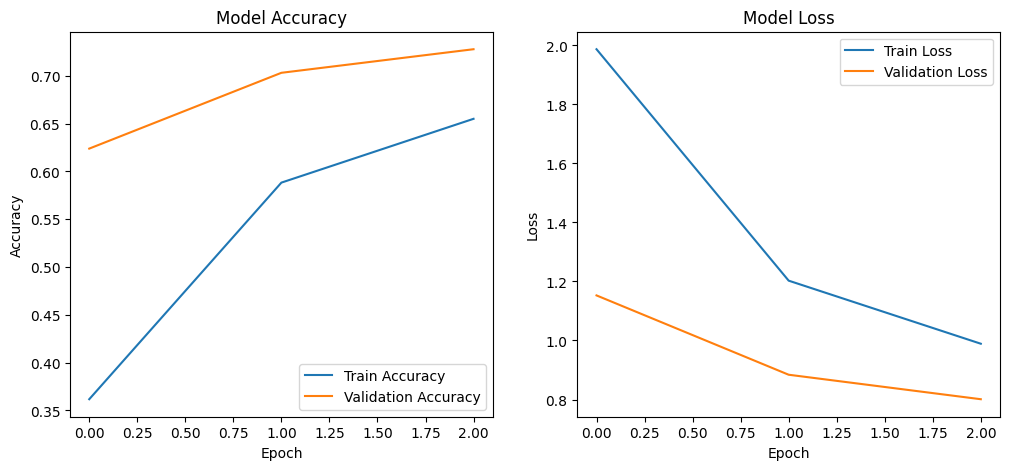

In [ ]:

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


2182/2182 ━━━━━━━━━━━━━━━━━━━━ 154s 69ms/step


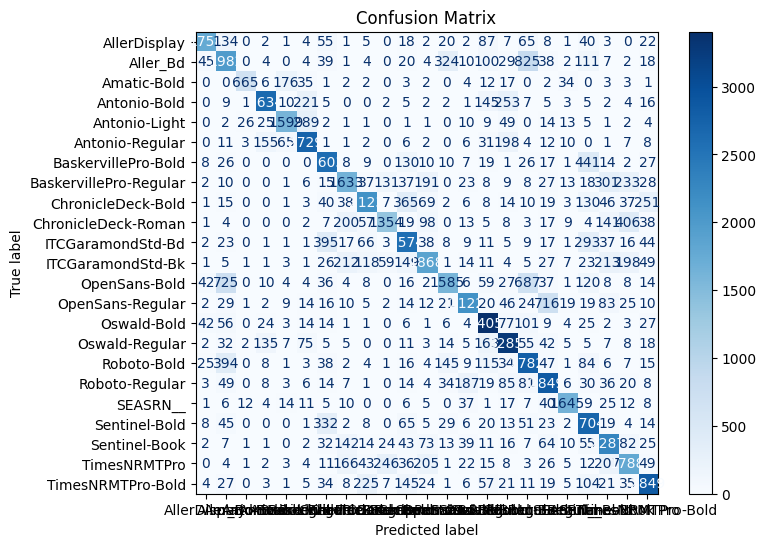

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

val_gen.reset()
y_pred_probs = model.predict(val_gen, steps=val_steps)
y_pred = np.argmax(y_pred_probs, axis=1)

y_true = val_gen.classes

cm = confusion_matrix(y_true, y_pred)

class_names = list(val_gen.class_indices.keys())

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix")
plt.show()


 Model Performance:
Accuracy : 0.7279
Precision: 0.7349
Recall   : 0.7279
F1-score : 0.7265

Classification Report:
                        precision    recall  f1-score   support

          AllerDisplay       0.90      0.79      0.84      2235
              Aller_Bd       0.55      0.56      0.55      3569
           Amatic-Bold       0.93      0.69      0.79       968
          Antonio-Bold       0.87      0.79      0.83      3332
         Antonio-Light       0.84      0.78      0.81      2054
       Antonio-Regular       0.79      0.84      0.82      3252
   BaskervillePro-Bold       0.70      0.77      0.73      3359
BaskervillePro-Regular       0.66      0.60      0.63      2731
    ChronicleDeck-Bold       0.78      0.67      0.72      3188
   ChronicleDeck-Roman       0.74      0.57      0.64      2386
     ITCGaramondStd-Bd       0.70      0.72      0.71      3571
     ITCGaramondStd-Bk       0.71      0.62      0.66      2996
         OpenSans-Bold       0.72      0.47      0.

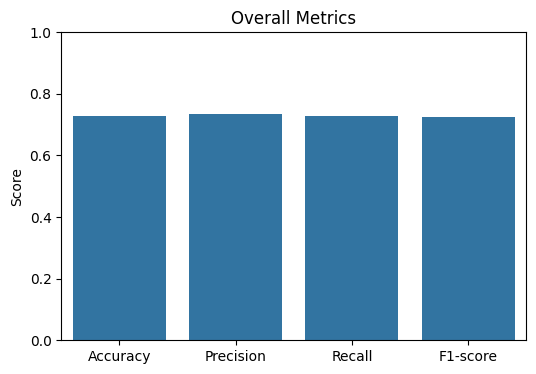

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred, average='weighted')
rec = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(" Model Performance:")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

metrics = {
    'Accuracy': acc,
    'Precision': prec,
    'Recall': rec,
    'F1-score': f1
}

plt.figure(figsize=(6, 4))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()))
plt.ylim(0, 1)
plt.title("Overall Metrics")
plt.ylabel("Score")
plt.show()
